In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../data/csv_data/data/dataCOVID19_es.csv')

In [3]:
data['nuevos_casos'] = np.nan
for CCAA in data.CCAA.unique():
    casos_hoy  = data.loc[data.CCAA == CCAA,'casos'].values[1:]
    casos_ayer = data.loc[data.CCAA == CCAA,'casos'].values[:-1]
    data.loc[data.CCAA == CCAA,'nuevos_casos'] = [np.nan]+list(casos_hoy-casos_ayer)

In [4]:
poblacion_CCAA = pd.read_csv('../data/info_data/PoblaciónCCAA.csv')

In [5]:
data['casos_pob'] = np.nan
for CCAA in data.CCAA.unique():
    data.loc[data.CCAA==CCAA,'casos_pob'] = data.loc[data.CCAA==CCAA,'casos']*1000 / poblacion_CCAA.loc[poblacion_CCAA.CCAA == CCAA,'Población'].values

In [12]:
data

,CCAA,fecha,casos,IA,UCI,muertes,nuevos_casos,casos_pob
0,Andalucía,2020-03-02,12.0,NaN,NaN,NaN,NaN,0.001424
1,Andalucía,2020-03-03,13.0,0.15,NaN,NaN,1.0,0.001543
2,Andalucía,2020-03-04,13.0,0.15,1.0,NaN,0.0,0.001543
3,Andalucía,2020-03-05,12.0,0.14,1.0,0.0,-1.0,0.001424
4,Andalucía,2020-03-06,21.0,0.25,1.0,0.0,9.0,0.002492
...,...,...,...,...,...,...,...,...
299,PaísVasco,2020-03-13,417.0,18.89,20.0,14.0,71.0,0.191456
300,PaísVasco,2020-03-14,417.0,21.97,23.0,14.0,0.0,0.191456
301,PaísVasco,2020-03-15,630.0,25.05,26.0,23.0,213.0,0.289250
302,PaísVasco,2020-03-16,630.0,28.13,29.0,23.0,0.0,0.289250


# Casos

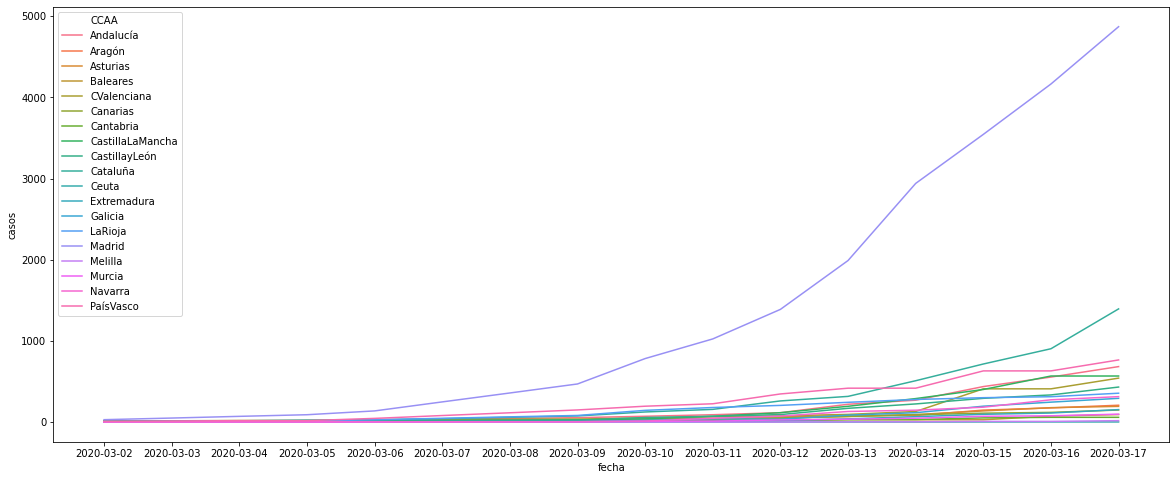

In [6]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="casos", hue='CCAA', data=data);

# Casos por CCAA / población

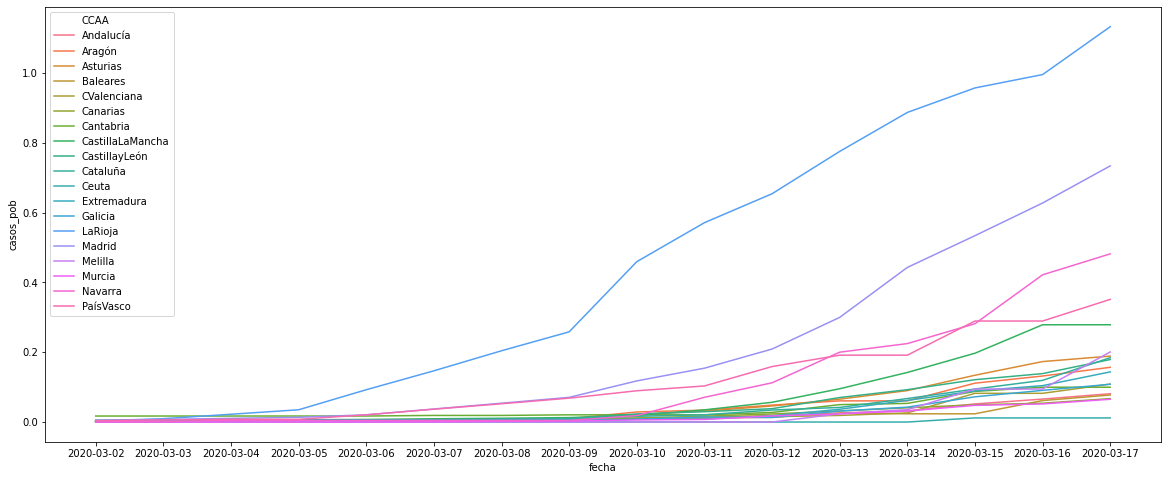

In [7]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="casos_pob", hue='CCAA', data=data);

# Nuevos casos

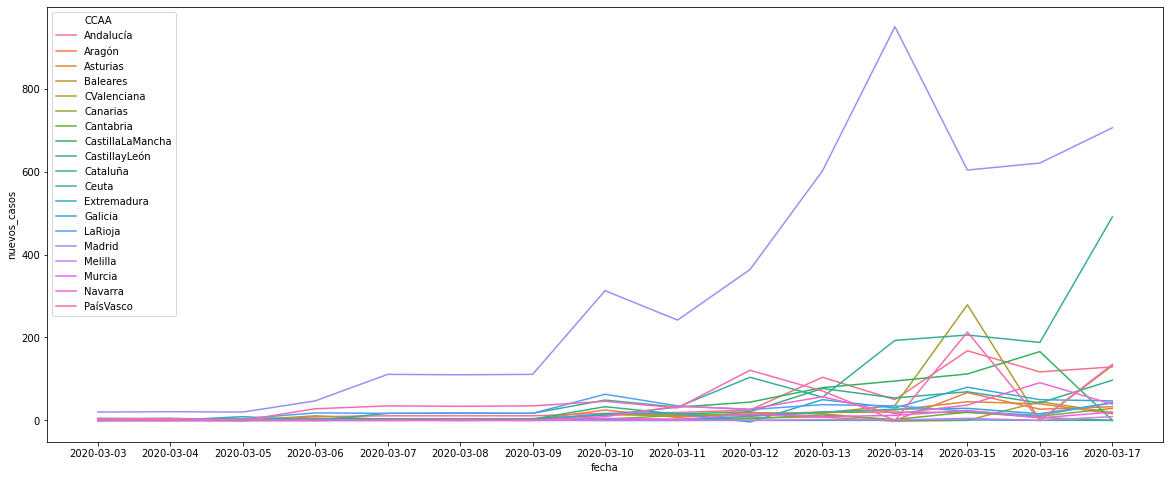

In [8]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="nuevos_casos", hue='CCAA', data=data);

# Incidencia Acumulada

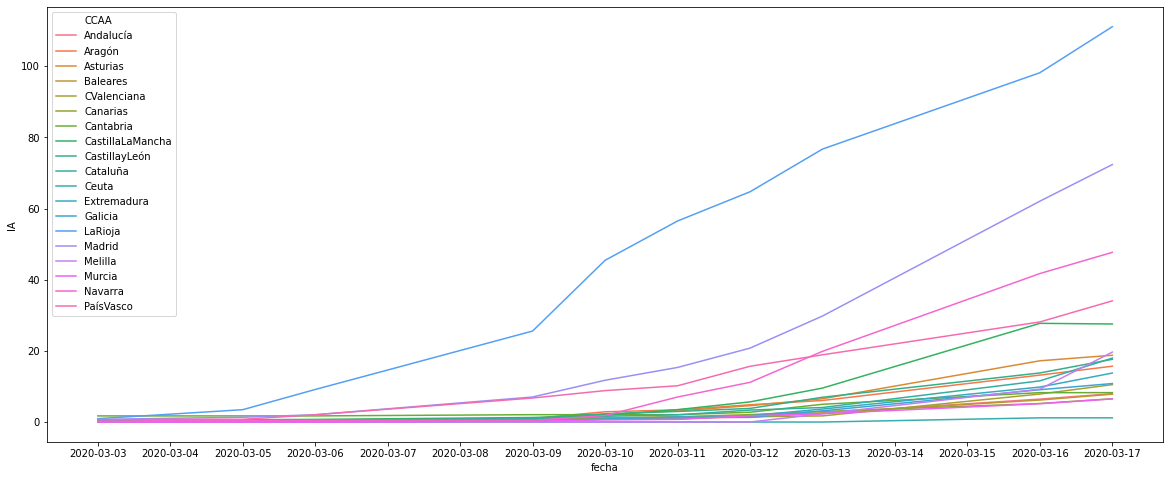

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="IA", hue='CCAA', data=data);

# UCI por CCAA

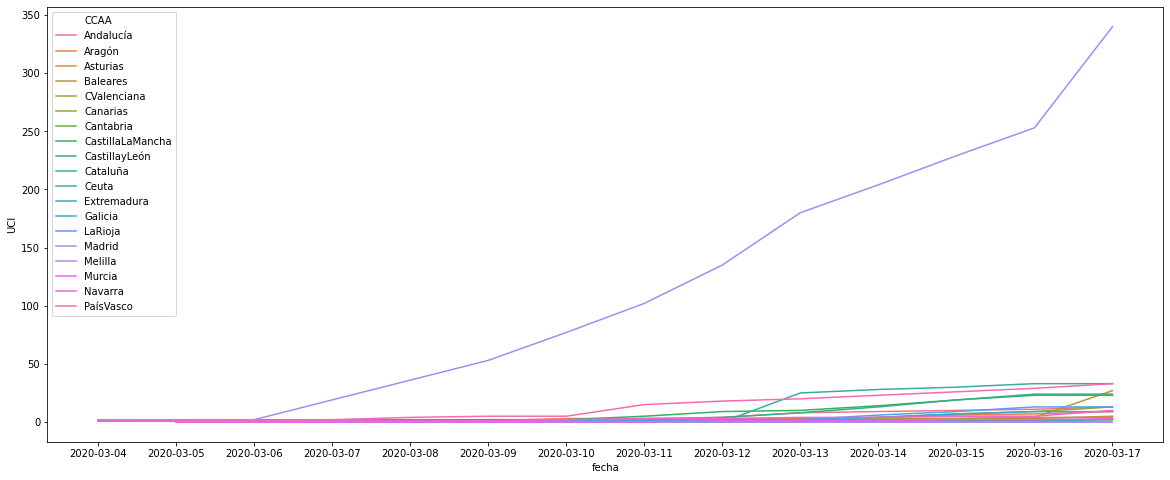

In [10]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="UCI", hue='CCAA', data=data);

# Muertes por CCAA

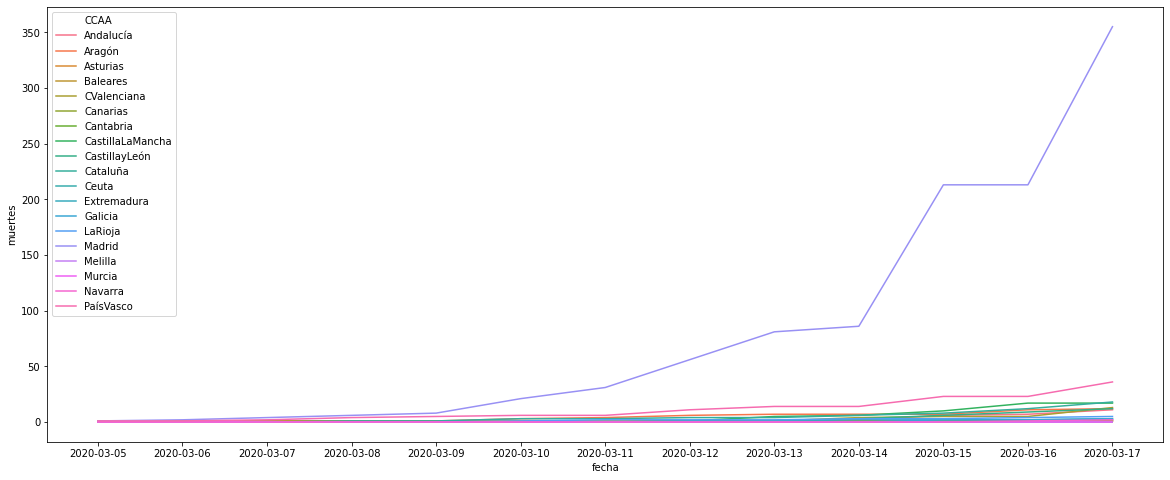

In [11]:
plt.figure(figsize=(20,8))
sns.lineplot(x="fecha", y="muertes", hue='CCAA', data=data);